# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [61]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [62]:
#data

In [63]:
d11 = data['A11']
d12 = data['A12']
d13 = data['A13']

data['total'] = d11 + d12 +d13

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

In [64]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [65]:
spot = data['D_TRA1_1_SPOT']

In [66]:
data.shape

(10638, 360)

# 결측치 처리

In [67]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

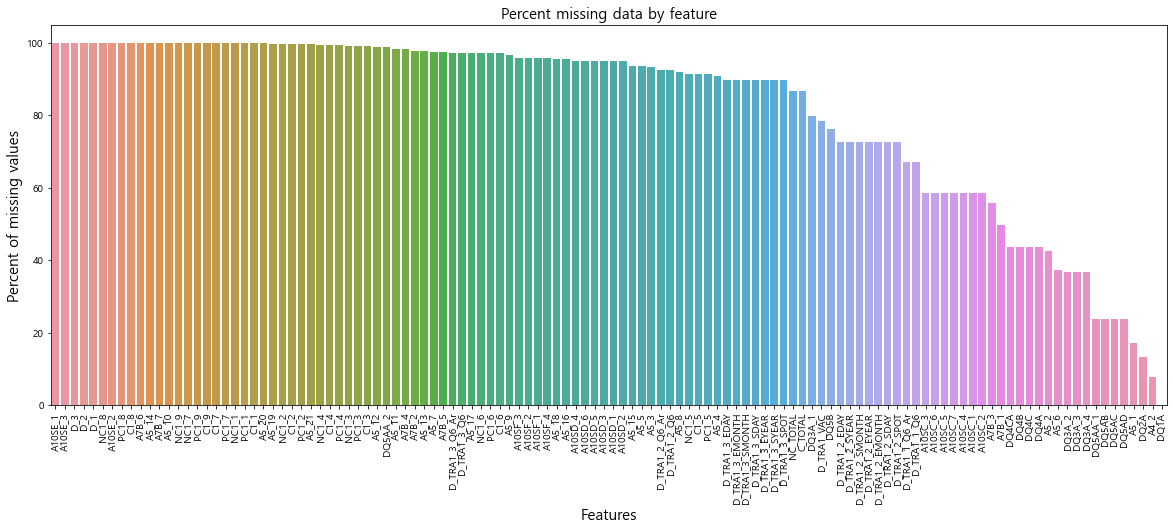

In [68]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [69]:
for i in data:
    data[i] = data[i].fillna(0)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Columns: 360 entries, SA1_1 to total
dtypes: float64(141), int64(217), object(2)
memory usage: 29.3+ MB


In [71]:
data

,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,D_TRA1_SMONTH,...,SAGE,BJOB,BINC1,BINC2,BEDU,BMAR,BFAM,BMON,WT_DOM,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,0,0,0,0,0,Y,1.0,2020.0,8.0,...,45,1,5,3,3,2,3,8,16052,7
21110610901_148196,1,0,0,0,0,0,Y,1.0,2020.0,6.0,...,25,1,2,2,4,1,1,6,8244,7
2231011065A_7203,1,0,0,0,0,0,Y,1.0,2020.0,1.0,...,53,11,5,1,3,2,3,1,10925,8
2302055001A_181404,1,0,0,0,0,0,Y,1.0,2020.0,7.0,...,35,1,4,4,4,2,2,7,9279,8
2305060097A_38902,1,0,0,0,0,0,Y,1.0,2020.0,2.0,...,19,12,7,1,3,1,3,2,9527,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,0,0,0,0,0,Y,1.0,2020.0,4.0,...,38,1,5,5,4,2,3,4,900,15
3901054306A_172336,1,0,0,0,0,0,Y,1.0,2020.0,6.0,...,35,1,6,3,4,2,2,6,4753,15
39010631871_142345,1,0,0,0,0,0,Y,1.0,2020.0,2.0,...,41,1,4,3,4,2,3,2,3059,15


In [58]:
plt.figure(figsize=(15,5))
plt.scatter(x=data.index,y=data['total'],alpha=0.01, color='g')
plt.show()

KeyboardInterrupt: 